Application of Multivariable Linear Regression
=====================================

In this Jupyter Notebook...

* Model experimental data of the mobility versus field and temperature for conjugated polymer materials

* Demonstrate the use of multivariable linear regression

* Compare linear regression for several transformations of the data

Import the necessary modules

In [1]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

Load the data [extracted from Fig 4 of Laquai, Frederic, Gerhard Wegner, and Heinz Bässler. "What determines the mobility of charge carriers in conjugated polymers?." Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences 365.1855 (2007): 1473-1487.]

In [2]:
file_name = 'data/conjpoly_mobility.csv'
names = ["field","temperature","mobility"]
data = pd.read_csv(file_name, header=None, names=names)
field = data.loc[:,"field"]
temperature = data.loc[:,"temperature"]
mobility = 10**data.loc[:,"mobility"]
temps = data.temperature.unique()

Plot the data

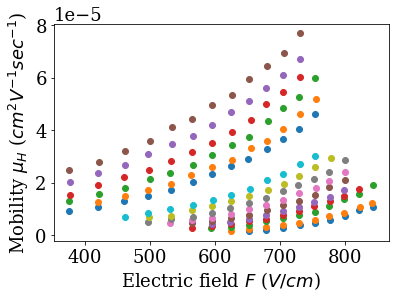

In [3]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for temp in temps:
    plt.scatter(field[data['temperature']==temp],mobility[data['temperature']==temp])
    
plt.xlabel('Electric field ${F}$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()

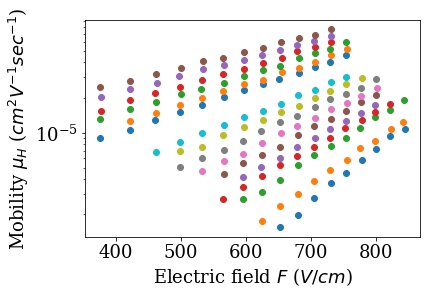

In [4]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for temp in temps:
    plt.scatter(field[data['temperature']==temp],mobility[data['temperature']==temp])
    
plt.yscale('log')

plt.xlabel('Electric field ${F}$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()

Perform a multi-variable linear regression on the data based on the form $\mu_{H} = a_{0} + a_{1} F + a_{2} T$

In [5]:
num_exp = len(mobility)
tt = np.zeros((3,3))
mt = np.zeros(3)

for i_exp in range(num_exp):
    t_vec = np.array([1, field[i_exp], temperature[i_exp]])
    tt += np.outer(t_vec, t_vec) / num_exp
    mt += mobility[i_exp] * t_vec / num_exp
    
tt_inv = np.linalg.inv(tt)

In [6]:
a = np.dot(tt_inv, mt)

Compare the linear regression model to the data

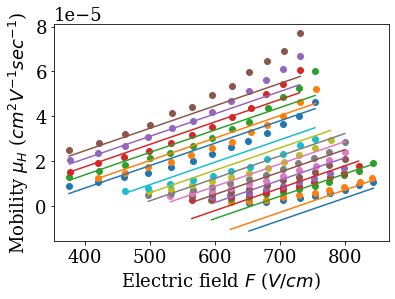

In [7]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for temp in temps:
    indices = np.where(data['temperature']==temp)
    plt.scatter(field.iloc[indices],mobility.iloc[indices])
    plt.plot(field.iloc[indices], 
                 a[0] + 
                 a[1] * field.iloc[indices] + 
                 a[2] * temperature.iloc[indices]
            )

plt.xlabel('Electric field $F$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()

Now perform a linear regression based on the transformed variables $\sqrt{F}$, $T$, $\log_{10} \mu_{H}$

In [8]:
num_exp = len(mobility)
tt = np.zeros((3,3))
mt = np.zeros(3)

for i_exp in range(num_exp):
    t_vec = np.array([1, np.sqrt(field[i_exp]), temperature[i_exp]])
    tt += np.outer(t_vec, t_vec) / num_exp
    mt += np.log10(mobility[i_exp]) * t_vec / num_exp
    
tt_inv = np.linalg.inv(tt)

In [9]:
a_trans1 = np.dot(tt_inv, mt)

Compare the new linear regression model to the data

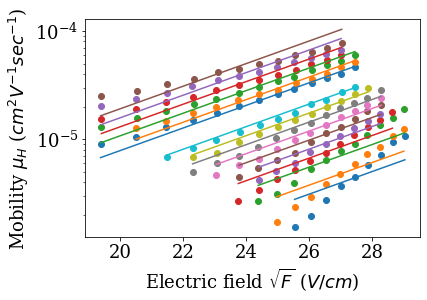

In [10]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


for temp in temps:
    indices = np.where(data['temperature']==temp)
    plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices])
    mobility_fit = 10**(a_trans1[0] +
                        a_trans1[1] * np.sqrt(field.iloc[indices]) +
                        a_trans1[2] * temperature.iloc[indices]
                       )
    plt.plot(np.sqrt(field.iloc[indices]),mobility_fit)

plt.yscale('log')

plt.xlabel('Electric field $\sqrt{F}$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()

Now perform a linear regression based on the transformed variables $\sqrt{F} / T^{2}$, $1/T^{2}$, $\log_{10} \mu_{H}$

In [11]:
num_exp = len(mobility)
tt = np.zeros((3,3))
mt = np.zeros(3)

for i_exp in range(num_exp):
    t_vec = np.array([1, np.sqrt(field[i_exp]) / temperature[i_exp] ** 2, 1 / temperature[i_exp] ** 2])
    tt += np.outer(t_vec, t_vec) / num_exp
    mt += np.log10(mobility[i_exp]) * t_vec / num_exp
    
tt_inv = np.linalg.inv(tt)

In [12]:
a_trans2 = np.dot(tt_inv, mt)

Compare the new linear regression model to the data

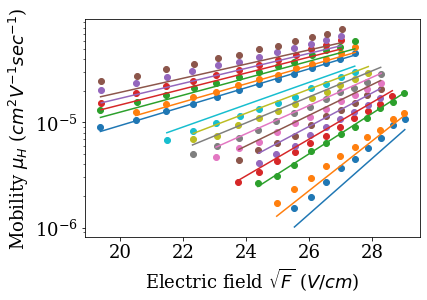

In [13]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


for temp in temps:
    indices = np.where(data['temperature']==temp)
    plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices])
    mobility_fit = 10**(a_trans2[0] +
                        a_trans2[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices]**2 +
                        a_trans2[2] / temperature.iloc[indices]**2
                       )
    plt.plot(np.sqrt(field.iloc[indices]),mobility_fit)
    
plt.yscale('log')

plt.xlabel('Electric field $\sqrt{F}$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()

Perform a linear regression based on the transformed variables $\sqrt{F} / T^{2}$, $1/T^{2}$, $\log_{10} \mu_{H}$ for temperatures above 273 K

In [14]:
num_exp = len(mobility)
tt = np.zeros((3, 3))
mt = np.zeros(3)

for i_exp in range(num_exp):
    if temperature[i_exp] >= 273:
        t_vec = np.array([1, np.sqrt(field[i_exp]) / temperature[i_exp] ** 2, 1 / temperature[i_exp] ** 2])

        tt += np.outer(t_vec, t_vec)
        mt += np.log10(mobility[i_exp]) * t_vec
    
tt_inv = np.linalg.inv(tt)

In [15]:
a_trans3 = np.dot(tt_inv, mt)

Compare the new linear regression model to the data

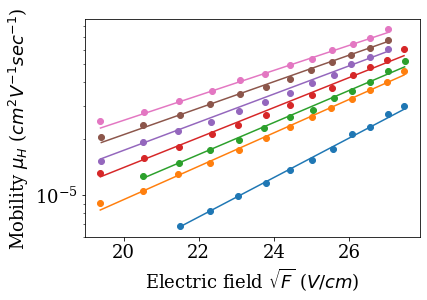

In [16]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


for temp in temps:
    if temp >= 273:
        indices = np.where(data['temperature']==temp)
        plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices])
        mobility_fit = 10**(a_trans3[0] +
                            a_trans3[1] * np.sqrt(field.iloc[indices])/temperature.iloc[indices]**2 +
                            a_trans3[2] / temperature.iloc[indices]**2
                           )
        plt.plot(np.sqrt(field.iloc[indices]),mobility_fit)

    
plt.yscale('log')

plt.xlabel('Electric field $\sqrt{F}$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')

plt.show()

This analysis can also be done with the built-in linear regression function from sklearn.

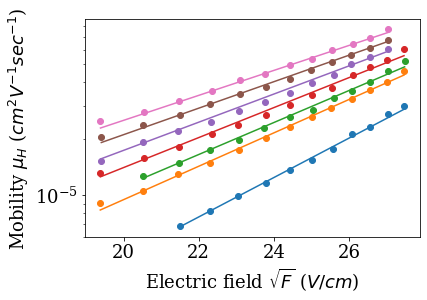

In [17]:
# create numpy arrays of appropriate variable transformations
fieldarr = np.array(field)[temperature>=273]
temperaturearr = np.array(temperature)[temperature>=273]
mobilityarr = np.log10(np.array(mobility)[temperature>=273])
var1 = np.sqrt(fieldarr)/(temperaturearr**2)
var2 = 1/(temperaturearr**2)
variables = np.array([var1,var2])
variables = np.swapaxes(variables,0,1)

# create model and calculate prediction performance
regr = linear_model.LinearRegression()
model = regr.fit(variables,mobilityarr)

# plot
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for temp in temps:
    if temp >= 273:
        indices = np.where(data['temperature']==temp)
        plt.scatter(np.sqrt(field.iloc[indices]),mobility.iloc[indices],label=str(temp))
        mobility_fit = 10**(regr.intercept_ +
                            regr.coef_[0] * np.sqrt(field.iloc[indices])/temperature.iloc[indices]**2 +
                            regr.coef_[1] / temperature.iloc[indices]**2
                           )
        #plt.plot(np.sqrt(field.iloc[indices]),y_preds[indices])
        plt.plot(np.sqrt(field.iloc[indices]),mobility_fit)
plt.yscale('log')
plt.xlabel('Electric field $\sqrt{F}$ ($V/cm$)')
plt.ylabel('Mobility $\mu_{H}$ ($cm^{2} V^{-1} sec^{-1}$)')
plt.show()
